In [113]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

# Read dataset

In [224]:
df = pd.read_csv('../Dataset/songs_normalize.csv')
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


# Preprocessing

## Check missing values

In [66]:
df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [67]:
df.isna().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

## Check datatypes

In [68]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [225]:
df = df.astype({"explicit": int})

## Remove duplicate rows

In [226]:
df.drop_duplicates(inplace=True)
df = df.reset_index()
df = df.drop('index', axis=1)
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,Jonas Brothers,Sucker,181026,0,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1937,Taylor Swift,Cruel Summer,178426,0,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1938,Blanco Brown,The Git Up,200593,0,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1939,Sam Smith,Dancing With A Stranger (with Normani),171029,0,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


## Dataset describe

In [227]:
df.describe()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,0.276662,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,0.447463,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,0.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,0.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,0.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,1.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,1.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


## Extract nominal-features

In [228]:
nominal_features = ['artist', 'song', 'genre']
cols = list(set(df.columns) - set(nominal_features))
cols_with_genre = cols + ['genre']

## Histogram of features before normalization

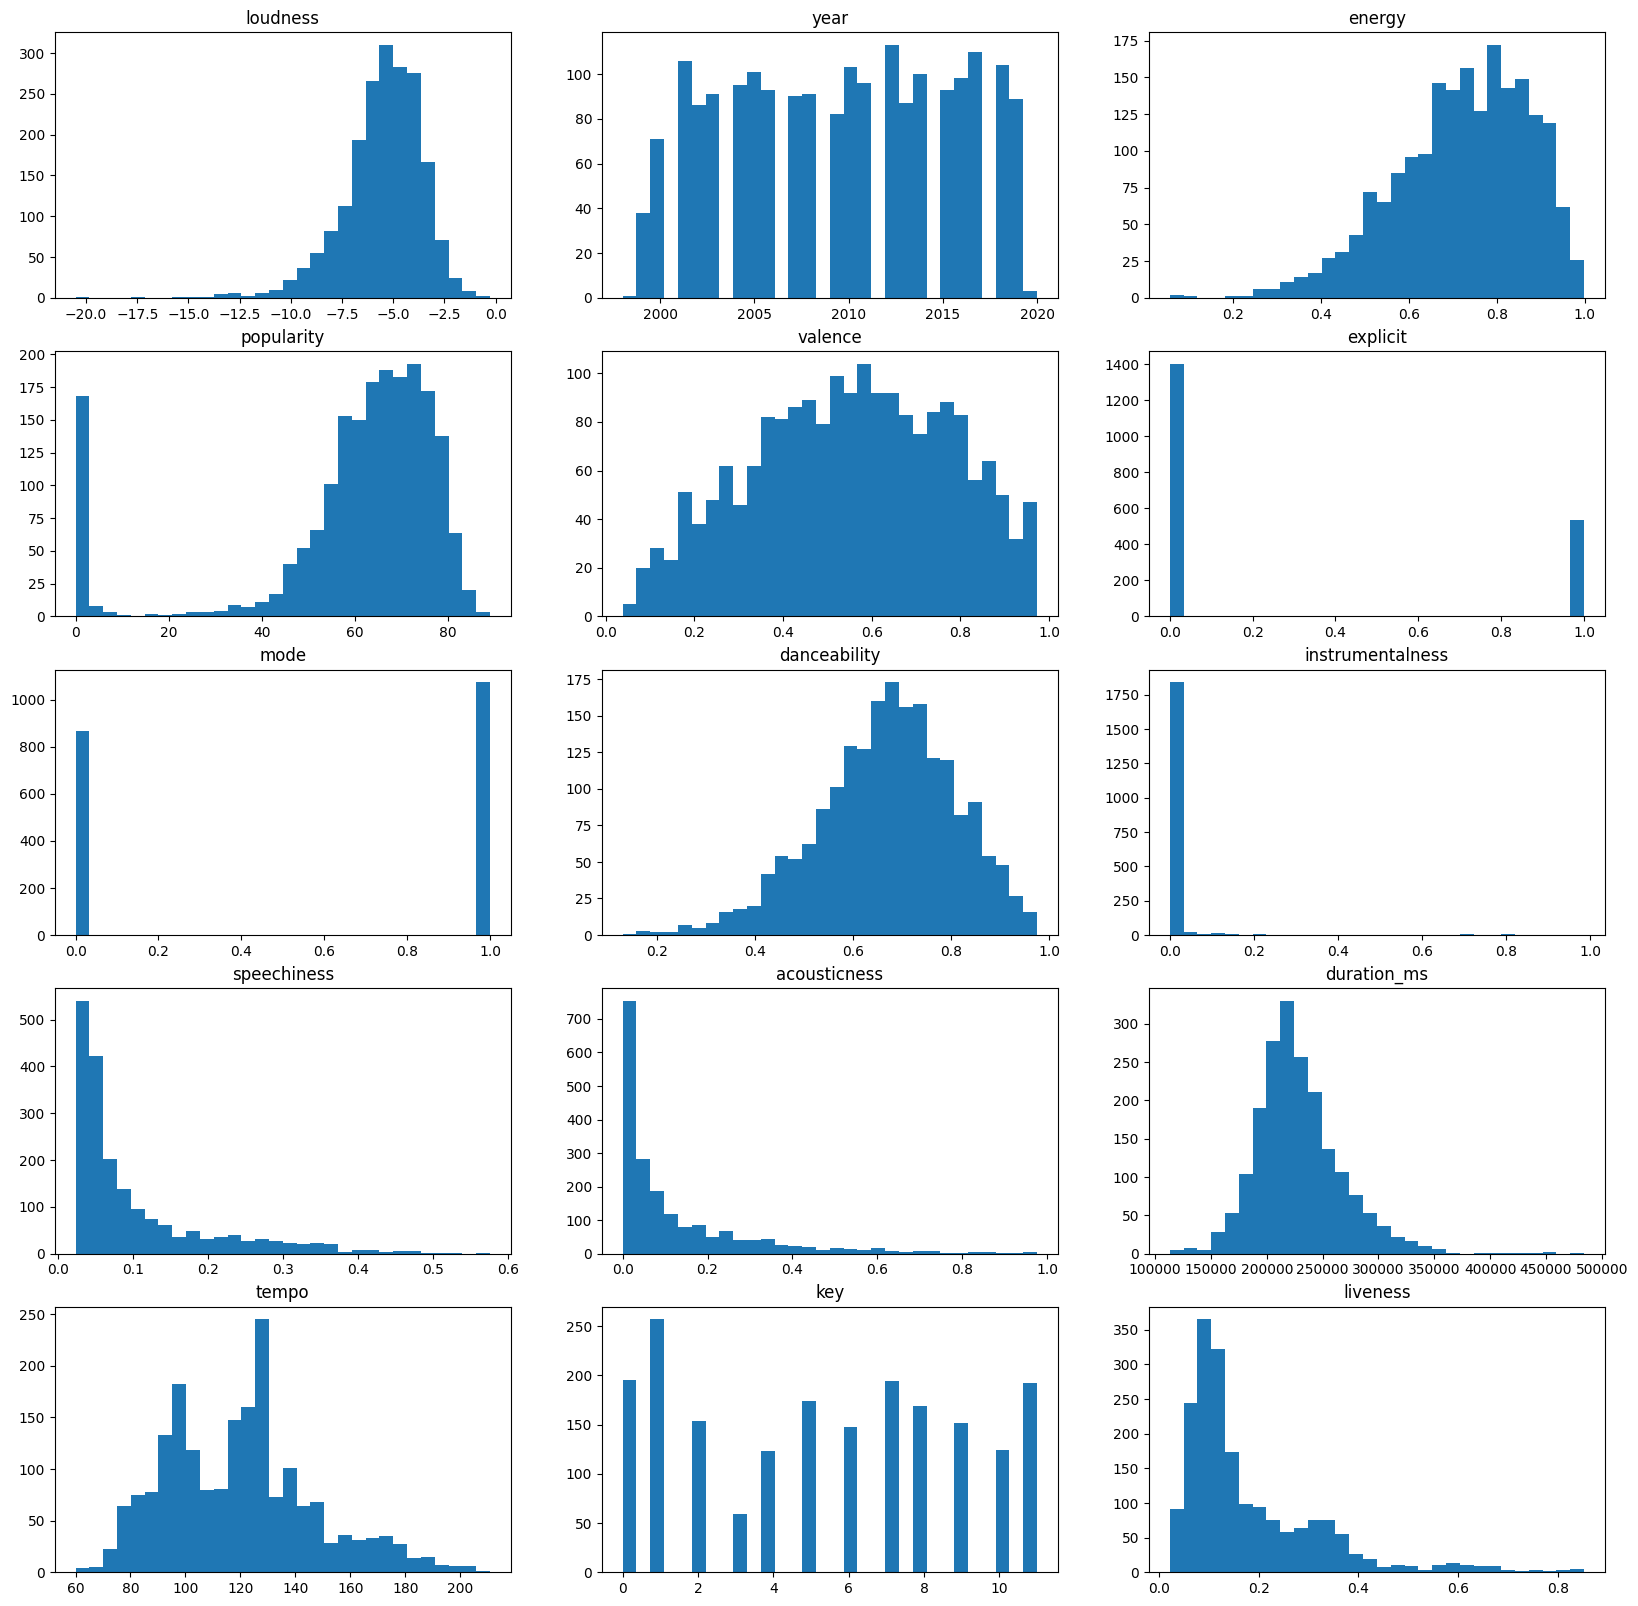

In [229]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

## Normalizing dataset

In [230]:
main_df = df

In [231]:
genre_col = main_df[main_df.columns[-1:]]
genre_col

,genre
0,pop
1,"rock, pop"
2,"pop, country"
3,"rock, metal"
4,pop
...,...
1936,pop
1937,pop
1938,"hip hop, country"
1939,pop


### Remove nominal features

In [232]:
numeric_features_df = df.drop(nominal_features, axis=1)

In [233]:
scaler = preprocessing.StandardScaler()
scaled = scaler.fit_transform(numeric_features_df)

In [234]:
pd.DataFrame(scaled, columns=cols).describe()

,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,acousticness,duration_ms,tempo,key,liveness
count,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03,1.941000e+03
mean,3.221420e-16,1.098211e-17,2.635707e-15,1.070756e-16,-6.369626e-16,-4.978558e-16,-1.830352e-18,2.196423e-17,-5.491057e-17,-3.660704e-17,7.321409e-17,-1.464282e-17,-6.223198e-17,4.392845e-17,-2.159816e-16
std,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00,1.000258e+00
min,-2.945869e+00,-6.184486e-01,-1.961238e+00,-2.774215e+00,-3.833010e+00,-4.361964e+00,-1.485582e+00,-7.738095e+00,-1.112993e+00,-8.383272e-01,-7.427491e-01,-1.739979e-01,-1.137379e+00,-2.331943e+00,-2.228747e+00
25%,-6.393776e-01,-6.184486e-01,-9.397911e-01,-1.690203e-01,-6.175766e-01,-6.382730e-01,-9.322307e-01,-5.034523e-01,-1.112993e+00,-6.666723e-01,-6.646173e-01,-1.739979e-01,-6.624844e-01,-7.381098e-01,-7.846434e-01
50%,-1.378445e-01,-6.184486e-01,8.165614e-02,2.496717e-01,5.823339e-02,1.141861e-01,1.744725e-01,1.181781e-01,8.984779e-01,-4.450814e-01,-4.194559e-01,-1.739979e-01,-4.097750e-01,3.185786e-02,-4.834137e-03
75%,4.931494e-01,1.616949e+00,9.328622e-01,6.218424e-01,6.913607e-01,7.750414e-01,7.278241e-01,6.944114e-01,8.984779e-01,2.623451e-01,2.771968e-01,-1.732147e-01,4.278575e-01,8.063548e-01,5.203382e-01
max,6.512566e+00,1.616949e+00,1.784068e+00,1.366184e+00,2.185256e+00,1.815398e+00,1.557852e+00,2.702200e+00,8.984779e-01,4.912634e+00,4.913820e+00,1.097502e+01,4.765090e+00,1.902426e+00,3.361035e+00


In [235]:
scaler = preprocessing.MinMaxScaler()
normalized = scaler.fit_transform(scaled)
df = pd.DataFrame(normalized, columns=[cols])
df

,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,acousticness,duration_ms,tempo,key,liveness
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727
1937,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122
1938,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704
1939,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946


In [236]:
df.describe()

,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,acousticness,duration_ms,tempo,key,liveness
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,0.311454,0.276662,0.523652,0.670036,0.636896,0.706121,0.488127,0.741176,0.553323,0.145772,0.131307,0.015607,0.192696,0.550718,0.398718
std,0.105753,0.447463,0.267070,0.241585,0.166204,0.161923,0.328661,0.095807,0.497277,0.173929,0.176831,0.089717,0.169464,0.236224,0.178944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.243856,0.000000,0.272727,0.629213,0.534279,0.602796,0.181818,0.692954,0.000000,0.029848,0.013813,0.000000,0.080457,0.376404,0.258347
50%,0.296880,0.000000,0.545455,0.730337,0.646572,0.724605,0.545455,0.752495,1.000000,0.068379,0.057154,0.000000,0.123271,0.558242,0.397853
75%,0.363593,1.000000,0.772727,0.820225,0.751773,0.831586,0.727273,0.807689,1.000000,0.191389,0.180312,0.000070,0.265183,0.741149,0.491805
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [237]:
df.shape

(1941, 15)

## Outlier Detection

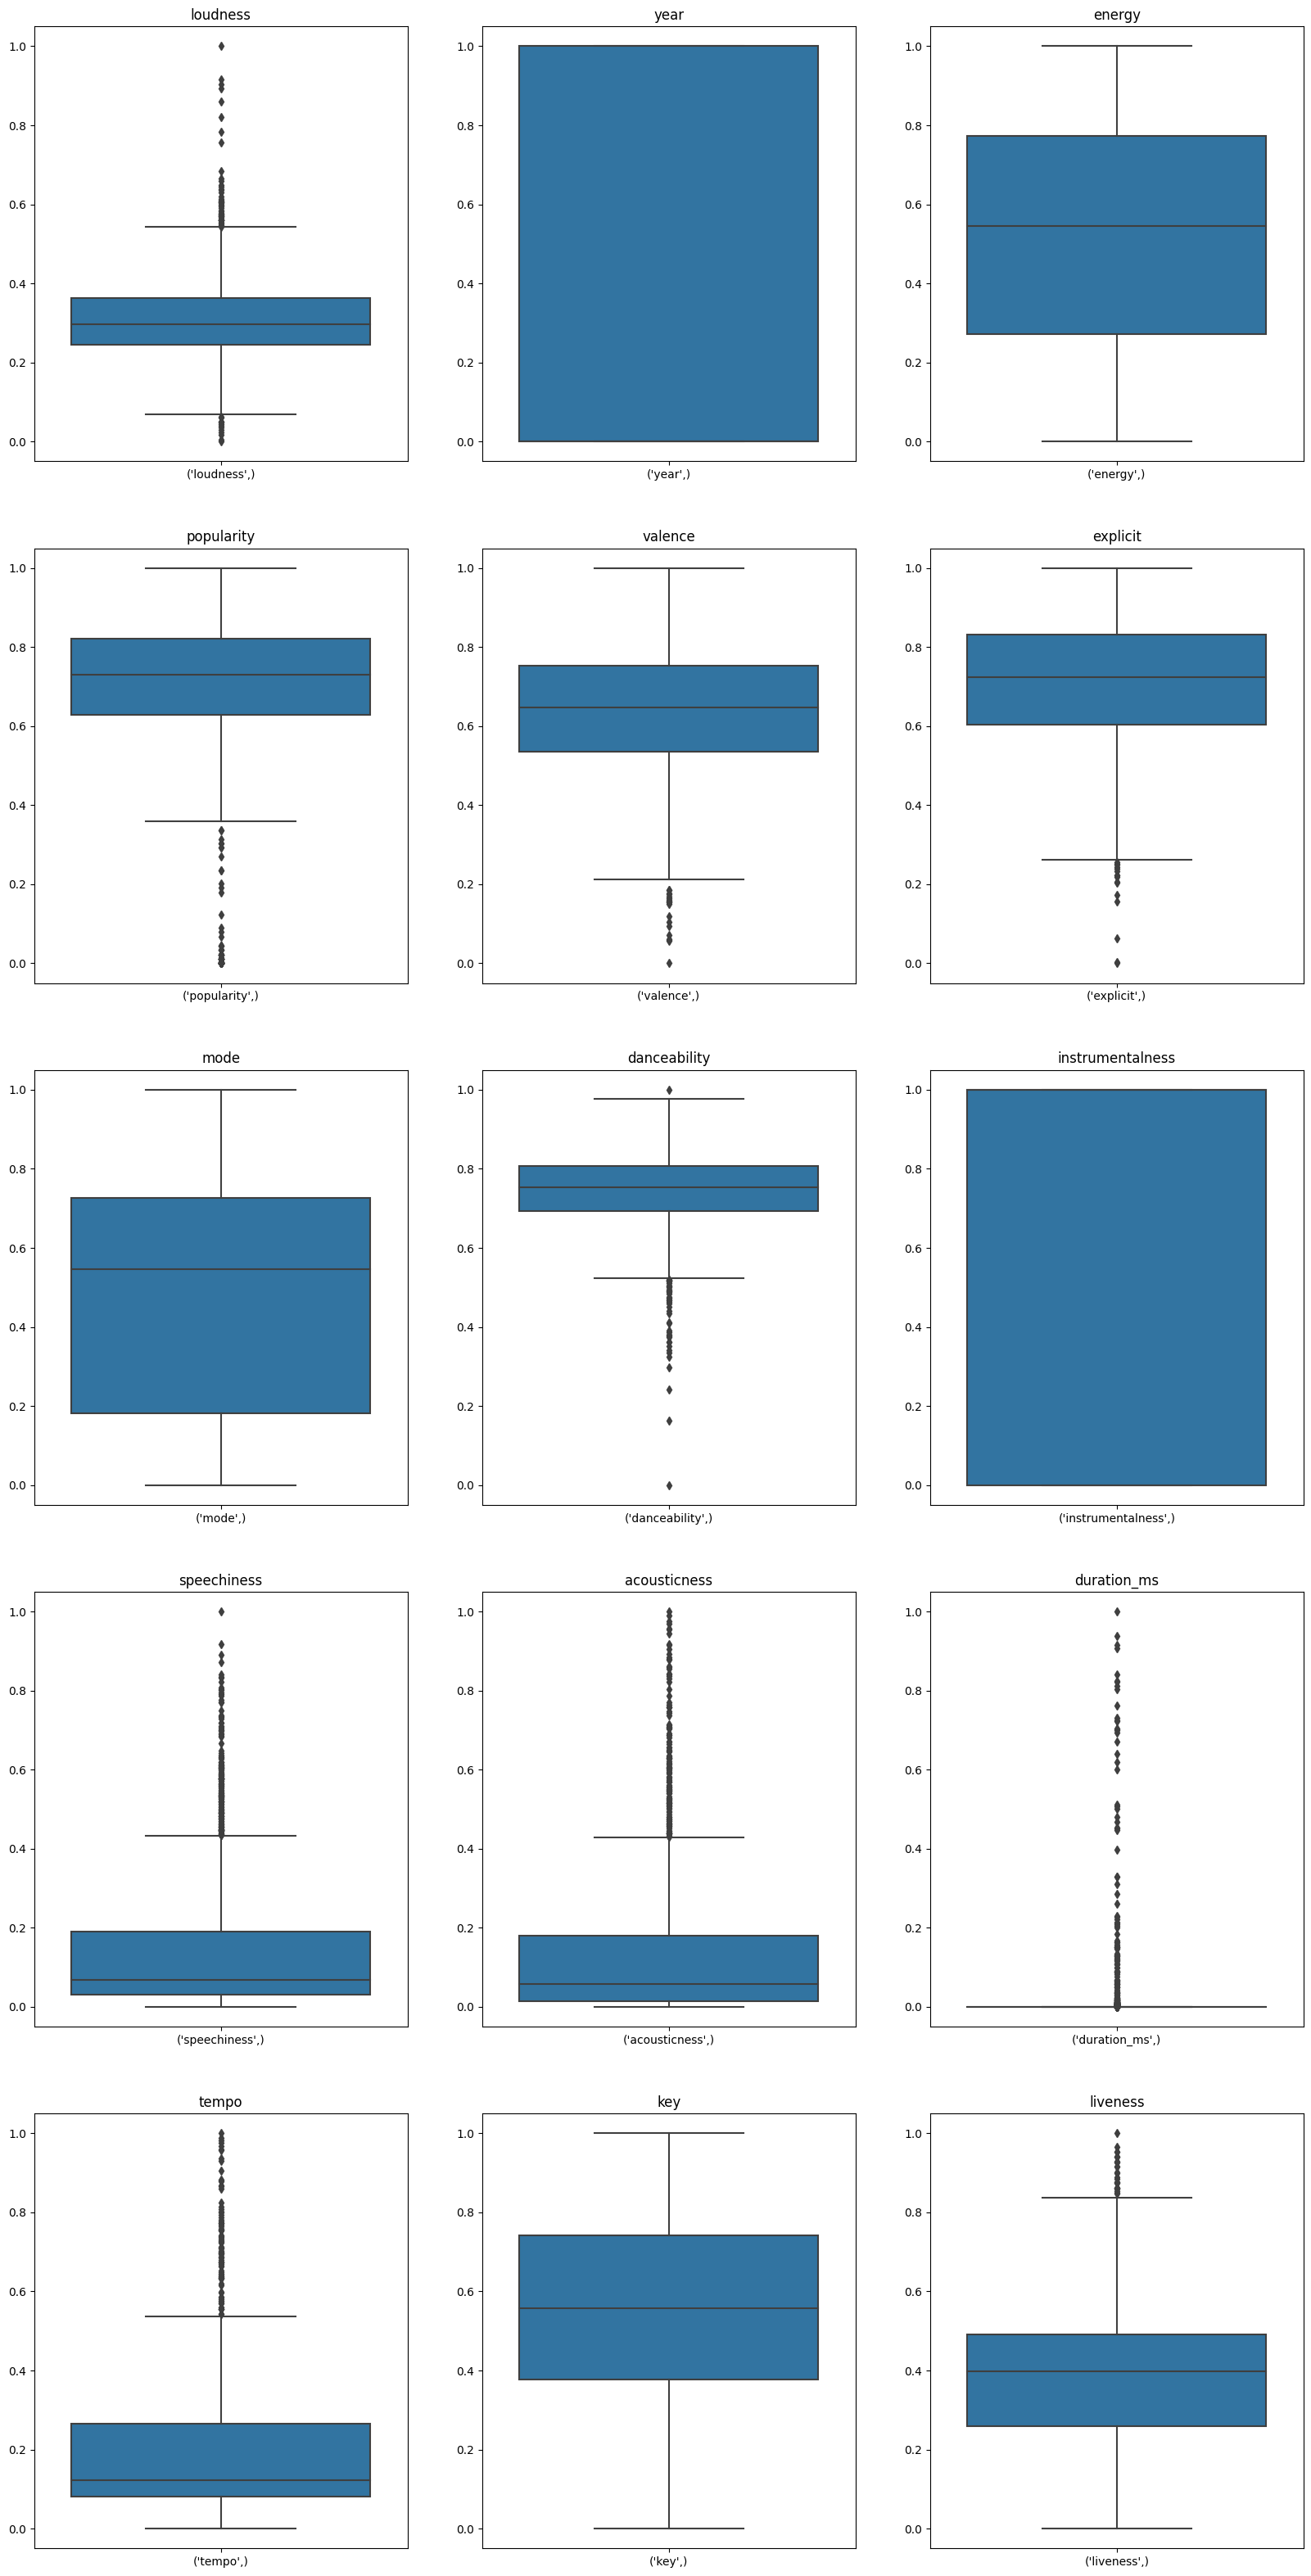

In [238]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 40))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    sns.boxplot(df[col], ax=ax[i,j])
    j += 1

In [239]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(df[cols])
# select all rows that are not outliers
mask = yhat != -1
count = 0
for i in yhat:
    if i != 1:
        count = count + 1
df = df[mask]
df = df.reset_index()
df = df.drop('index', axis=1)
df

/tmp/ipykernel_4305/2325720469.py:12: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop('index', axis=1)


,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,acousticness,duration_ms,tempo,key,liveness
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727
1743,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122
1744,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704
1745,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946


## Append genre to cleaned dataset

In [240]:
df_with_genre = df
genre_col = genre_col[mask]
genre_col = genre_col.reset_index()
genre_col = genre_col.drop('index', axis=1)
df_with_genre['genre'] = genre_col
df_with_genre.columns = cols_with_genre
df_with_genre

,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,acousticness,duration_ms,tempo,key,liveness,genre
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272,pop
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118,"rock, pop"
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441,"pop, country"
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615,"rock, metal"
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727,pop
1743,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122,pop
1744,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704,"hip hop, country"
1745,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946,pop


## Save the preprocessed dataset

In [84]:
df.to_csv('../Dataset/songs_normalize_preprocessed.csv')

## Histogram after normalization

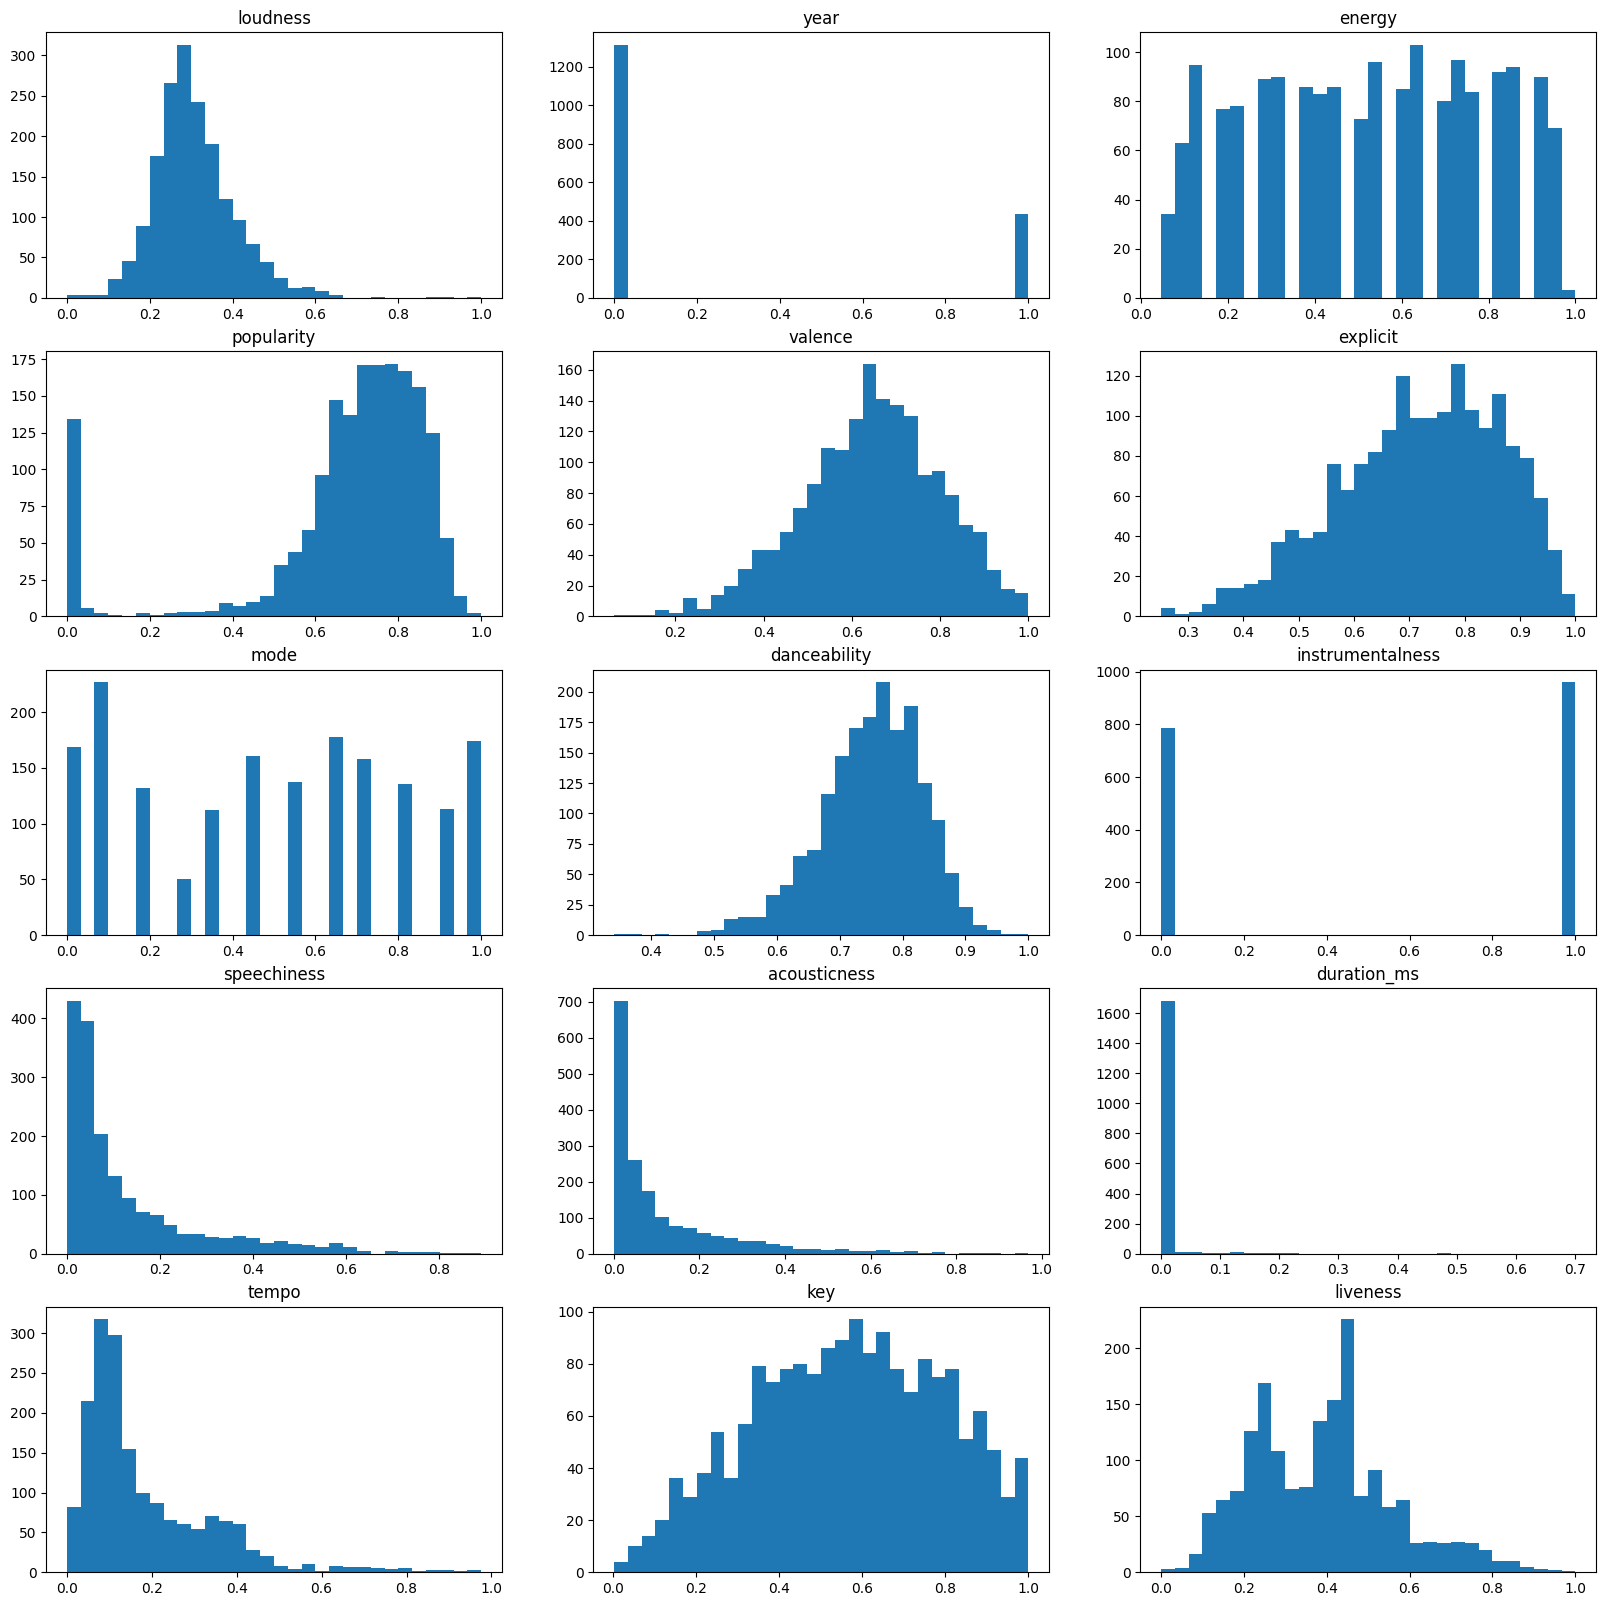

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
i = 0
j = 0
for col in cols:
    if j == 3:
        i += 1
        j = 0
    ax[i, j].set(title=col)
    ax[i, j].hist(df[col], 30)
    j += 1

# Exploring and analyzing the data

## Most popular songs by year

In [241]:
most_popular = main_df.query('popularity>=80', inplace=False).sort_values('popularity', ascending=False)
most_popular[:10]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1281,The Neighbourhood,Sweater Weather,240400,0,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1270,Tom Odell,Another Love,244360,1,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
198,Eminem,Without Me,290320,1,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,1,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1764,Billie Eilish,lovely (with Khalid),200185,0,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1563,WILLOW,Wait a Minute!,196520,0,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
1188,Bruno Mars,Locked out of Heaven,233478,0,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1655,Ed Sheeran,Perfect,263400,0,2017,85,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,0.168,95.050,pop
1469,Avicii,The Nights,176658,0,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1467,The Neighbourhood,Daddy Issues,260173,0,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"


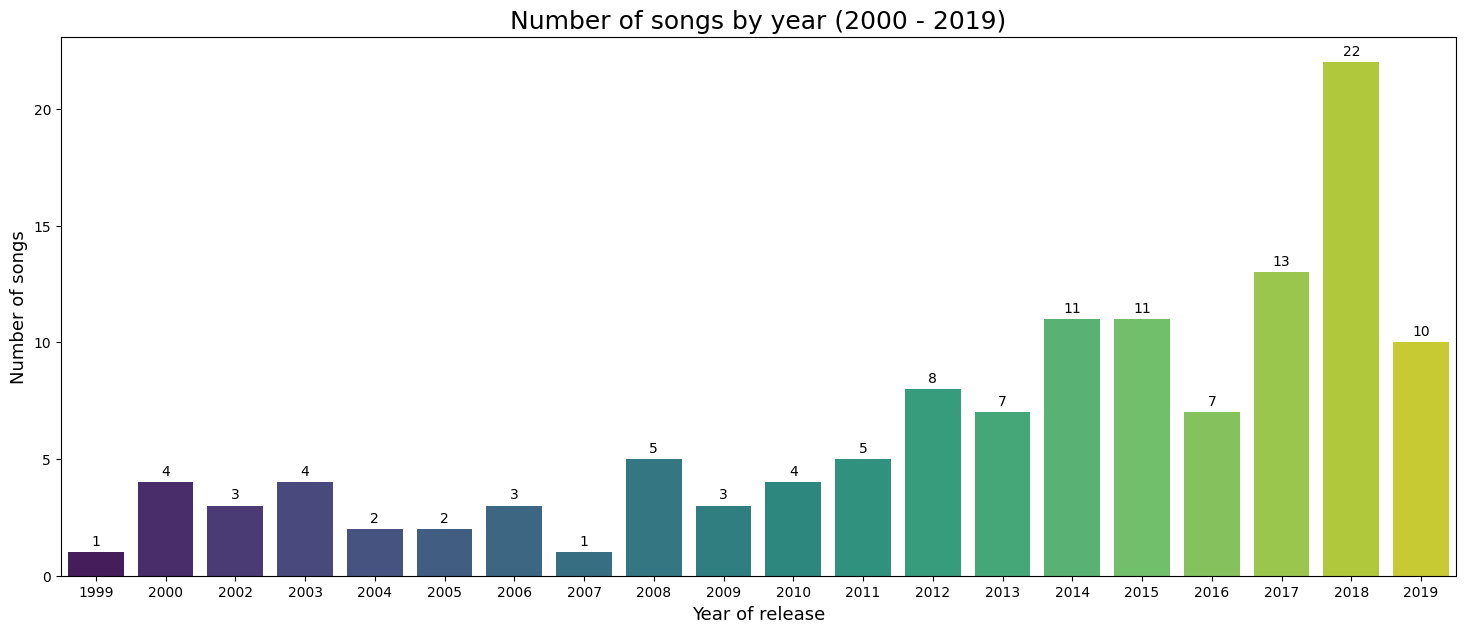

In [242]:
songs_by_year =most_popular.groupby("year").size().to_frame(name = 'songs').reset_index()

plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'year', y = 'songs', data = songs_by_year, palette = 'viridis')

for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

plt.xlabel('Year of release', size = 13)
plt.ylabel('Number of songs', size = 13)
plt.title('Number of songs by year (2000 - 2019)', size = 18)
plt.show()

## Heatmap

/tmp/ipykernel_4305/2893933146.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")


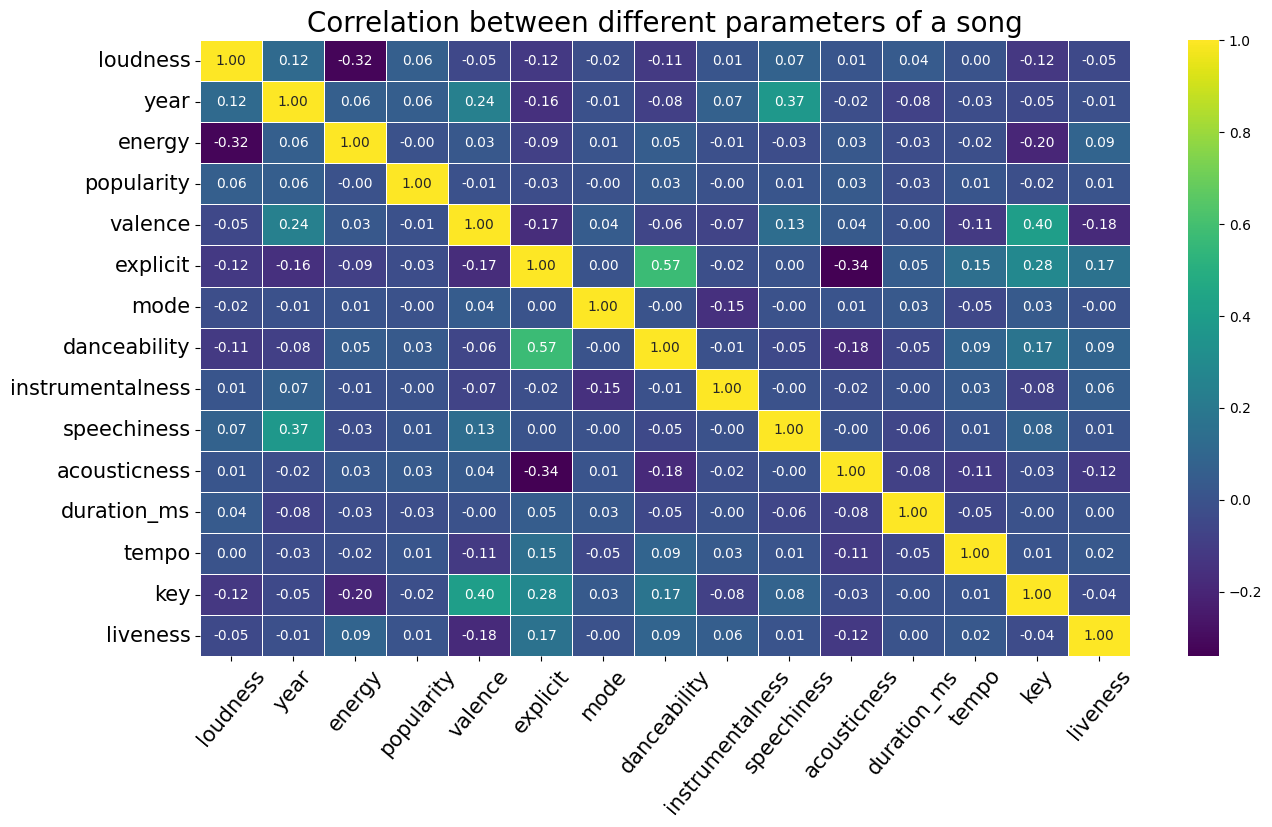

In [243]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

## Popular artists

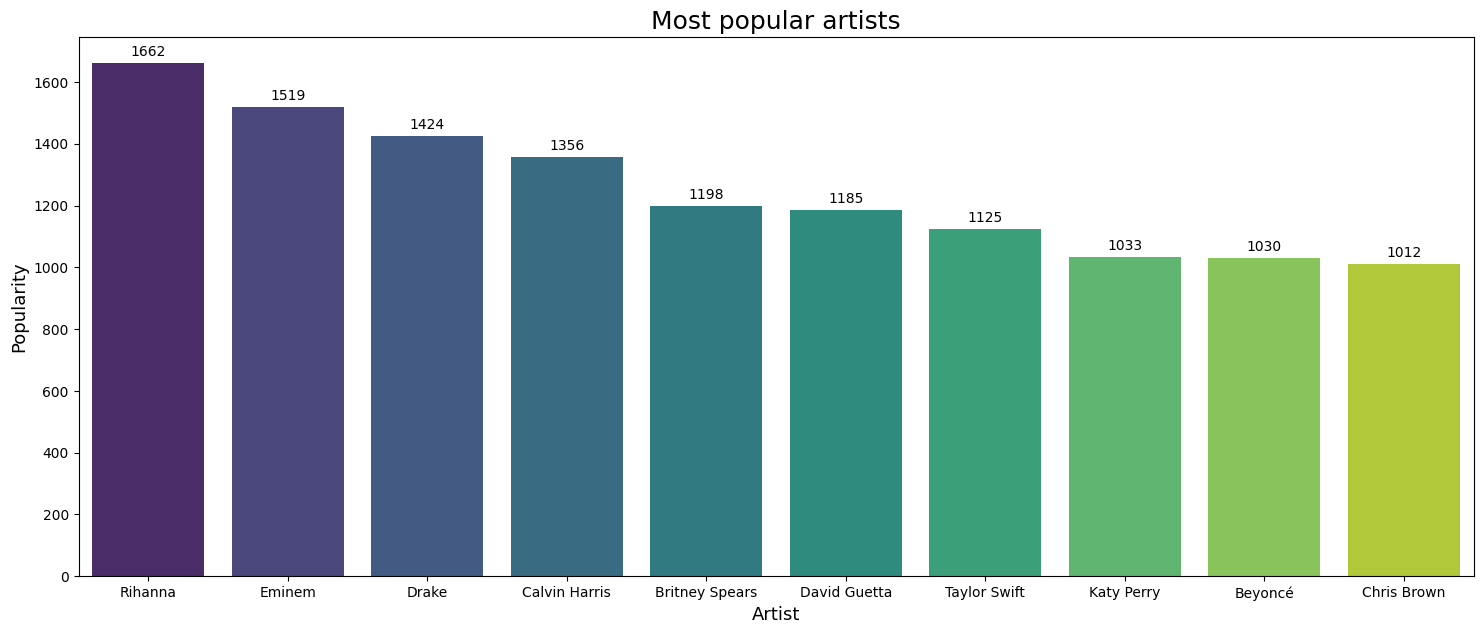

In [244]:
popularity_by_artist = main_df.groupby('artist', as_index = False)['popularity'] \
                                .sum().sort_values(['popularity'],ascending=False)

popularity_by_artist['popularity'] = popularity_by_artist['popularity'].astype('Int64')

popularity_by_artist = popularity_by_artist.head(10)

plt.figure(figsize = (18,7))
plots = sns.barplot(x = 'artist', y = 'popularity', data = popularity_by_artist, palette = 'viridis')

for bar in plots.patches:

    plots.annotate(format(bar.get_height(), '.0f'),
               (bar.get_x() + bar.get_width() / 2,
                bar.get_height()), ha='center', va='center',
               size=10, xytext=(0, 8),
               textcoords='offset points')

plt.xlabel('Artist', size = 13)
plt.ylabel('Popularity', size = 13)
plt.title('Most popular artists', size = 18)
plt.show()

# Use one-hot encoding to create new columns for each genre

In [245]:
unique_features = []
genres = df_with_genre["genre"].str.strip()
for genre in genres:
    for g in genre.split(','):
        unique_features.append(g.strip())
unique_features = set(unique_features)
unique_features

{'Dance/Electronic',
 'Folk/Acoustic',
 'R&B',
 'World/Traditional',
 'blues',
 'classical',
 'country',
 'easy listening',
 'hip hop',
 'latin',
 'metal',
 'pop',
 'rock',
 'set()'}

## Remove "set()" from genre

In [246]:
mask = df_with_genre["genre"].str.contains("set")
df_with_genre = df_with_genre[~mask]
df_with_genre = df_with_genre.reset_index()
df_with_genre = df_with_genre.drop('index', axis=1)
df_with_genre

,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,acousticness,duration_ms,tempo,key,liveness,genre
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272,pop
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118,"rock, pop"
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441,"pop, country"
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615,"rock, metal"
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727,pop
1722,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122,pop
1723,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704,"hip hop, country"
1724,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946,pop


## Assign genres to dataframe

In [247]:
genre_feature = []
genres = df_with_genre["genre"].str.strip()
for genre in genres:
    genre_feature.append(",".join(['genre.' + g.strip() for g in genre.split(',')]))
    
df_with_genre['genre'] = genre_feature

genres = df_with_genre['genre'].str.get_dummies(sep=",")
df_with_genre = pd.concat([df_with_genre, genres], axis=1)
df_with_genre

,loudness,year,energy,popularity,valence,explicit,mode,danceability,instrumentalness,speechiness,...,genre.World/Traditional,genre.blues,genre.classical,genre.country,genre.easy listening,genre.hip hop,genre.latin,genre.metal,genre.pop,genre.rock
0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,...,0,0,0,0,0,0,0,0,1,0
1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,...,0,0,0,0,0,0,0,0,1,1
2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,...,0,0,0,1,0,0,0,0,1,0
3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,...,0,0,0,0,0,0,0,1,0,1
4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,...,0,0,0,0,0,0,0,0,1,0
1722,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,...,0,0,0,0,0,0,0,0,1,0
1723,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,...,0,0,0,1,0,1,0,0,0,0
1724,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,...,0,0,0,0,0,0,0,0,1,0


In [248]:
df_with_genre.to_csv('../Dataset/songs_preprocessed_with_genre.csv')

## Popular genres

In [250]:
genres_dic = {}
for row in df_with_genre.index:
    for col in df_with_genre.columns:
        if 'genre' in col and col != 'genre':
            if df_with_genre.at[row, col] == 1:
                genre_name = col.replace('genre.', '')
                genres_dic[genre_name] = genres_dic.get(genre_name, 0) + 1

genre_dic_df = {'Genres':[], 'Songs':[]}
for key, value in genres_dic.items():
    genre_dic_df['Genres'].append(key)
    genre_dic_df['Songs'].append(value)

genre_df = pd.DataFrame(genre_dic_df).sort_values(['Songs'],ascending=False)
genre_df

,Genres,Songs
0,pop,1445
5,hip hop,654
4,R&B,398
6,Dance/Electronic,349
1,rock,211
3,metal,63
9,latin,58
2,country,19
7,Folk/Acoustic,18
11,World/Traditional,7


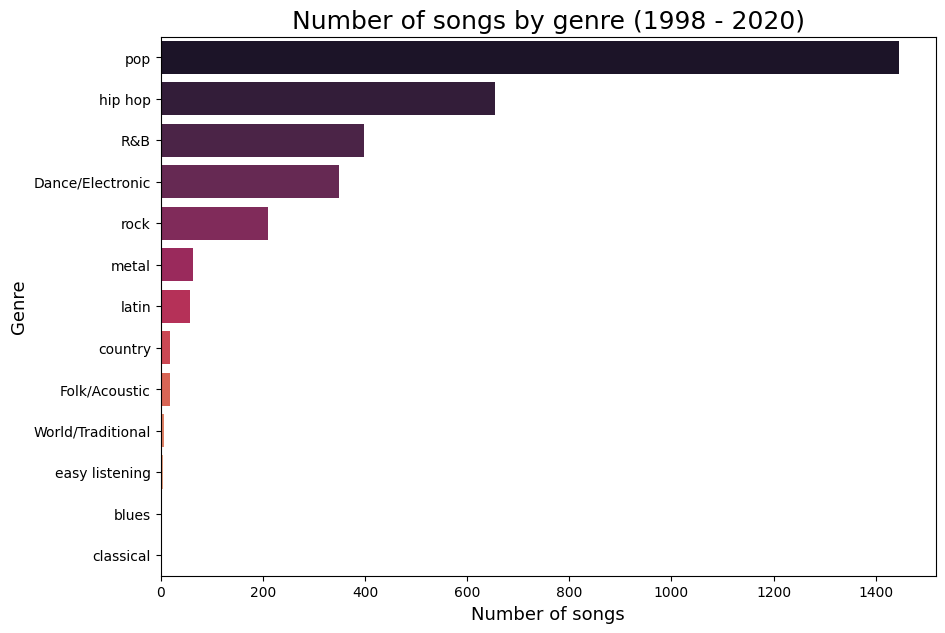

In [251]:
plt.figure(figsize = (10,7))
plots = sns.barplot(x = 'Songs', y = 'Genres', data = genre_df, palette = 'rocket')  
plt.xlabel('Number of songs', size = 13)
plt.ylabel('Genre', size = 13)
plt.title('Number of songs by genre (1998 - 2020)', size = 18)
plt.show()